In [2]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [8]:
# Model 4a (Chain 1): 1 prey, 1 middle predator (who can eat only prey), and 1 apex predator (who can eat both prey and middle predator)
# without carrying capacity

# x = population density of prey
# y = population density of middle predator
# z = population density of apex predator

# Initializing parameters
a = 0.08 # prey growth rate

b1 = 0.001 # middle predator kill rate of prey
b21 = 0.001 # apex predator kill rate of prey
b22 = 0.0001 # apex predator kill rate of middle predator

c1 = 0.02 # middle predator death rate
c2 = 0.02 # apex predator death rate

d1 = 0.0002 # middle predator growth rate from eating prey
d21 = 0.0001 # apex predator growth rate from eating prey
d22 = 0.00015 # apex predator growth rate from eating middle predator

# Defining Lotka-Volterra differential equations
def dSdt1(S, t):
    x, y, z = S
    return [a*x - b1*x*y - b21*x*z,
            -c1*y + d1*x*y - b22*y*z,
            -c2*z + d21*x*z + d22*y*z
           ]

In [18]:
# Comparing ODE

# Initializing population densities
x0 = 500
y0 = 20
z0 = 5
S0 = (x0, y0, z0)

t = np.linspace(0, 3000, 1000) # time array

# SciPy ODEint Solver
sol1 = odeint(dSdt1, S0, t)

sol1_x = sol1[:, 0] # prey population over time
sol1_y = sol1[:, 1] # middle predator population over time
sol1_z = sol1[:, 2] # apex predator population over time

# Runge-Kutta ODE Solver
def odeSolver(S0, dSdt, total_time, time_steps):
    """
    Solves a system of ODEs using the "RK4" Runge-Kutta method

    Parameters:
        S0: (list) representing all initial populations
        dSdt: function representing the system of ODEs
            -takes current populations and time as parameters
            -returns a list describing the LV derivative equations 
        total_time: (float) total time frame for which the ODE is solved in
        time_steps: (int) number of time points over total_time interval

    Returns:
        S: (NumPy array) array of shape (n, time_steps) containing the population values at each time step
            -n = number of variables
        t: (NumPy array) array containing time points corresponding to the time steps from 0 to total_time
    """
    n = len(S0) # number of variables
    S = np.zeros((n, time_steps)) # solution array
    t = np.linspace(0, total_time, time_steps) # time array
    h = t[1] - t[0] # time step size

    # Defining initial values
    for i in range(n):
        S[i, 0] = S0[i]

    # Implementing Runge-Kutta equations
    for i in range(time_steps - 1):
        k1 = np.array(dSdt(S[:, i], t[i]))
        k2 = np.array(dSdt(S[:, i] + h/2 * k1, t[i] + h/2))
        k3 = np.array(dSdt(S[:, i] + h/2 * k2, t[i] + h/2))
        k4 = np.array(dSdt(S[:, i] + h * k3, t[i] + h))
        
        S[:, i + 1] = S[:, i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return S, t
    
# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt1, 3000, 1000)

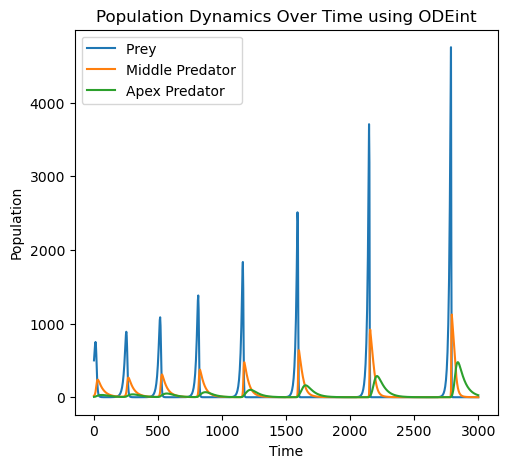

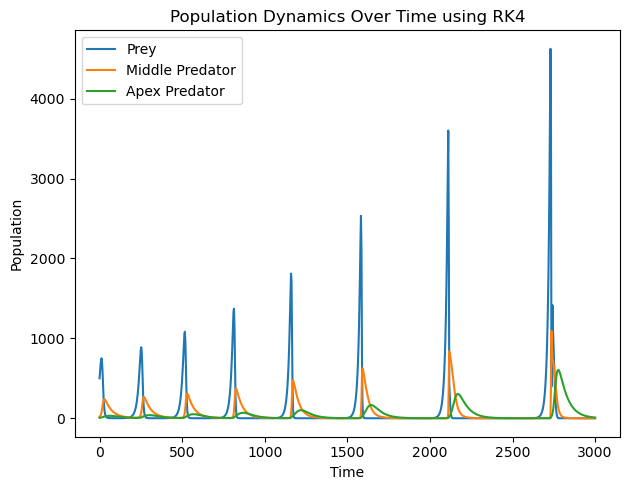

In [20]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol1_x, label = "Prey ")
plt.plot(t, sol1_y, label = "Middle Predator")
plt.plot(t, sol1_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey")
plt.plot(t, S[1], label = "Middle Predator")
plt.plot(t, S[2], label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4")
plt.tight_layout()
plt.show()

In [14]:
# Model 4b (Chain 1): 1 prey, 1 middle predator (who can eat only prey), and 1 apex predator (who can eat both prey and middle predator)
# with carrying capacity

k1 = 2000 # carrying capacity of prey population
k2 = 200 # carrying capacity of middle predator population
k3 = 20 # carrying capacity of apex predator population

def dSdt2(S, t):
    x, y, z = S
    return [a*x*(1-x/k1) - b1*x*y -b21*x*z,
            -c1*y + d1*x*y*(1-y/k2) - b22*y*z,
            -c2*z + (d21*x*z + d22*y*z)*(1-z/k3)
           ]

# Initializing population densities
x0 = 500
y0 = 20
z0 = 5
S0 = (x0, y0, z0)

t = np.linspace(0, 300, 1000) # time array

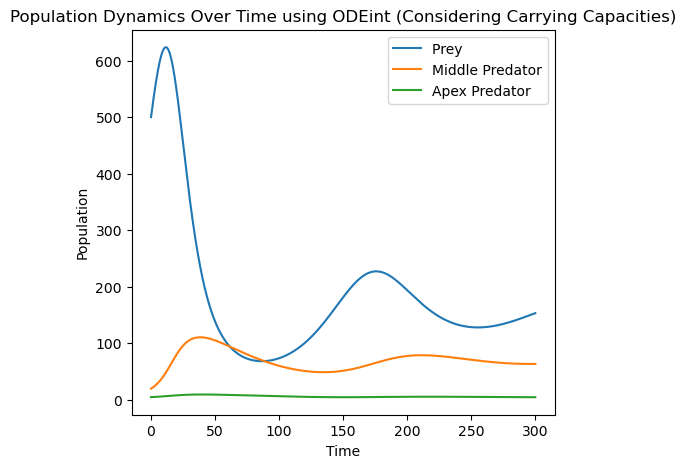

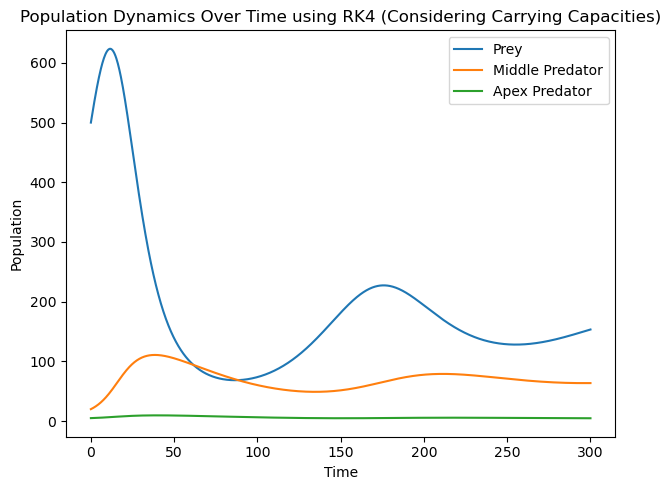

In [16]:
# Comparing ODE

# SciPy ODEint Solver
sol2 = odeint(dSdt2, S0, t)

sol2_x = sol2[:, 0] # prey population over time
sol2_y = sol2[:, 1] # predator population over time
sol2_z = sol2[:, 2] # predator population over time

# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt2, 300, 1000)

# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol2_x, label = "Prey ")
plt.plot(t, sol2_y, label = "Middle Predator")
plt.plot(t, sol2_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint (Considering Carrying Capacities)")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey")
plt.plot(t, S[1], label = "Middle Predator")
plt.plot(t, S[2], label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4 (Considering Carrying Capacities)")
plt.tight_layout()
plt.show()